In [63]:
import pandas as pd
import numpy as np

In [64]:
train_file_path="C:/Users/superuser/Desktop/ResearchProject/Data/asap-sas-train.csv"
training_examples=pd.read_csv(train_file_path,encoding="ISO-8859-1")
training_examples.head()

,Id,answer_set,score1,score2,student_response
0,1,1,1,1,Some additional information that we would need...
1,2,1,1,1,"After reading the expirement, I realized that ..."
2,3,1,1,1,"What you need is more trials, a control set up..."
3,4,1,0,0,The student should list what rock is better an...
4,5,1,2,2,For the students to be able to make a replicat...


In [65]:
# import mxnet as mx
# from bert_embedding import BertEmbedding

# bert_embedding = BertEmbedding(model='bert_24_1024_16', dataset_name='book_corpus_wiki_en_cased')

In [66]:
test_file_path="C:/Users/superuser/Desktop/ResearchProject/Data/asap-sas-test.csv"
test_set=pd.read_csv(test_file_path,encoding="ISO-8859-1")
test_set.head()

,Id,answer_set,student_response
0,1673,1,The procedures I think they should have includ...
1,1674,1,"In order to replicate this experiment, you wou..."
2,1675,1,"In order to replicate their experiment, you wo..."
3,1676,1,Pleace a simple of one material into one conta...
4,1677,1,Determin the mass of four different samples ma...


In [67]:
training_examples.dtypes

Id                   int64
answer_set           int64
score1               int64
score2               int64
student_response    object
dtype: object

In [68]:
training_examples.shape # there are around 17000 examples

(17043, 5)

In [69]:
training_examples.answer_set.unique() # there are 10 question prompts covering science and biology. 

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64)

In [70]:
training_examples.groupby('answer_set').count() # there are around 1700 examples per question prompt.

,Id,score1,score2,student_response
answer_set,,,,
1,1672,1672,1672,1672
2,1278,1278,1278,1278
3,1808,1808,1808,1808
4,1657,1657,1657,1657
5,1795,1795,1795,1795
6,1797,1797,1797,1797
7,1799,1799,1799,1799
8,1799,1799,1799,1799
9,1798,1798,1798,1798


In [71]:
print("Minimum score1:" , training_examples.min()['score1'])
print("Maximum score1:" , training_examples.max()['score1'])

Minimum score1: 0
Maximum score1: 3


In [72]:
print("Minimum score2:" , training_examples.min()['score2'])
print("Maximum score2:" , training_examples.max()['score2'])

Minimum score2: 0
Maximum score2: 3


### Answer key for question prompt - answer set1
###### A good response must include atleast three of the following additional information 
how much vinegar was used in each container
<br>what type of vinegar was used in each container
<br>what materials to test
<br>what size surface area of materials should be used
<br>how long each sample was rinsed in distilled water
<br>what drying method to use
<br>what size type of container to use



In [73]:
training_examples['student_response'][1] #sample student response 

'After reading the expirement, I realized that the additional information you need to replicate the expireiment is one, the amant of vinegar you poured in each container, two, label the containers before you start yar expirement and three, write a conclusion to make sure yar results are accurate.'

In [74]:
# only answer_set 1, 5, 6 are used for analysis and model creation
training_examples=training_examples.loc[(training_examples['answer_set'].isin([1,5,6]))]

In [75]:
training_examples.sort_values(['score1','score2'],ascending=[False,False]).sample(1)

,Id,answer_set,score1,score2,student_response
8734,14483,6,0,0,The to enter the cell you have to use ATP energy.


In [76]:
ss1="""Three processes used by cells to control the movement of substances across the cell membrane are: diffusion, osmosis, and active transport.  Diffusion is when substances are moved from areas of a higher concentration to areas of a lower concentration. Osmosis is the movement of water through a selectively permeable membrane.  The water moves from a high concentration to a low concentration.  Active transport is the opposite of diffusion.  In active transport substances move from areas of a low concentration to areas of a high concentration."""
#ss1="My name is Samyuktha"
ss2="""Selective permeability is used by the cell membrane to allow certain substances to move across
Passive transport occurs when substances move from an area of higher concentration to an area of lower concentration
Osmosis is the diffusion of water across the cell membrane
Facilitated diffusion occurs when the membrane controls the pathway for a particle to enter or leave a cell
Active transport occurs when a cell uses energy to move a substance across the cell membrane, and/or a substance moves from an area of low to high concentration, or against the concentration gradient
Pumps are used to move charged particles like sodium and potassium ions through membranes using energy and carrier proteins
Membrane-assisted transport occurs when the membrane of the vesicle fuses with the cell membrane forcing large molecules out of the cell as in exocytosis
Membrane-assisted transport occurs when molecules are engulfed by the cell membrane as in 
Membrane-assisted transport occurs when vesicles are formed around large molecules as in 
Membrane-assisted transport occurs when vesicles are formed around liquid droplets as in 
Protein channels or channel proteins allow for the movement of specific molecules or substances into or out of the cell"""

#ss1="I like chocolate"
#ss2="select required columns and rows"

### Count Vectorizer method

CountVectorizer and TfidfVectorizer in scikit-learn detect word boundary and remove punctuations automatically

In [99]:
def cosine_distance_countvectorizer_method(s1, s2):
        
    # sentences to list
    allsentences = [s1 , s2]
    
    # packages
    from sklearn.feature_extraction.text import CountVectorizer
    from scipy.spatial import distance
    
    # text to vector
    vectorizer = CountVectorizer(stop_words='english')
    all_sentences_to_vector = vectorizer.fit_transform(allsentences)
    text_to_vector_v1 = all_sentences_to_vector.toarray()[0].tolist()
    text_to_vector_v2 = all_sentences_to_vector.toarray()[1].tolist()
    
    # distance of similarity
    cosine = distance.cosine(text_to_vector_v1, text_to_vector_v2)
    #print('Similarity of two sentences are equal to ',round((1-cosine)*100,2),'%')
    return round((1-cosine)*100,2)

In [100]:
cosine_distance_countvectorizer_method(ss1 , ss2)

45.85

### Glove Embedding 

#### “GloVe is an unsupervised learning algorithm for obtaining vector representations for words.” (Jeffrey Pennington, Richard Socher, and Christopher D. Manning. 2014. Global Vectors for Word Representation)
The GloVe algorithm takes a large text corpus as input and produces multidimensional vectors for every word found in the corpus. The goal of the algorithm is to produce similar vectors for words that are semantically related. The vectors output by this algorithm are also called GloVe vectors or GloVe word embeddings.

In [79]:
gloveFile="C:/Users/superuser/Desktop/ResearchProject/Data/glove.6B.50d.txt"
import numpy as np
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    with open(gloveFile, encoding="utf8" ) as f:
        content = f.readlines()
    model = {}
    for line in content:
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model

import re
from nltk.corpus import stopwords
import pandas as pd

def preprocess(raw_text):

    # keep only words
    letters_only_text = re.sub("[^a-zA-Z]", " ", raw_text)

    # convert to lower case and split 
    words = letters_only_text.lower().split()

    # remove stopwords
    stopword_set = set(stopwords.words("english"))
    cleaned_words = list(set([w for w in words if w not in stopword_set]))

    return cleaned_words

def cosine_distance_between_two_words(word1, word2):
    import scipy
    return (1- scipy.spatial.distance.cosine(model[word1], model[word2]))

def calculate_heat_matrix_for_two_sentences(s1,s2):
    s1 = preprocess(s1)
    s2 = preprocess(s2)
    result_list = [[cosine_distance_between_two_words(word1, word2) for word2 in s2] for word1 in s1]
    result_df = pd.DataFrame(result_list)
    result_df.columns = s2
    result_df.index = s1
    return result_df

def cosine_distance_wordembedding_method(s1, s2):
    import scipy
    vector_1 = np.mean([model[word] for word in preprocess(s1)],axis=0)
    vector_2 = np.mean([model[word] for word in preprocess(s2)],axis=0)
    cosine = scipy.spatial.distance.cosine(vector_1, vector_2)
    print('Word Embedding method with a cosine distance asses that our two sentences are similar to',round((1-cosine)*100,2),'%')

def heat_map_matrix_between_two_sentences(s1,s2):
    df = calculate_heat_matrix_for_two_sentences(s1,s2)
    import seaborn as sns
    import matplotlib.pyplot as plt
    fig, ax = plt.subplots(figsize=(5,5)) 
    ax_blue = sns.heatmap(df, cmap="YlGnBu")
    # ax_red = sns.heatmap(df)
    print(cosine_distance_wordembedding_method(s1, s2))
    return ax_blue

In [80]:
model = loadGloveModel(gloveFile)

Loading Glove Model
Done. 400000  words loaded!


Word Embedding method with a cosine distance asses that our two sentences are similar to 95.64 %
None


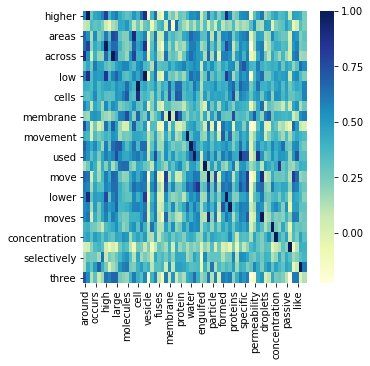

In [81]:
heat_map_matrix_between_two_sentences(ss1,ss2)

Cohen’s kappa: a statistic that measures degree of agreement among raters. 

In [82]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(training_examples['score1'], training_examples['score2'])

0.9000011436814797

### Adding question and answer key 

In [83]:
question_one  = """A group of students wrote the following procedure for their investigation.
Procedure:
1.	Determine the mass of four different samples.
2.	Pour vinegar in each of four separate, but identical, containers.
3.	Place a sample of one material into one container and label. Repeat with remaining samples, placing a single sample into a single container.
4.	After 24 hours, remove the samples from the containers and rinse each sample with distilled water.
5.	Allow the samples to sit and dry for 30 minutes. 
6.	Determine the mass of each sample.
After reading the group’s procedure, describe what additional information you would need in order to replicate the experiment. Make sure to include at least three pieces of information.
"""
question_five = """Starting with mRNA leaving the nucleus list and describe four major steps involved in protein synthesis."""
question_six  = """List and describe three processes used by cells to control the movement of substances across the cell membrane"""

In [84]:
training_examples.at[training_examples['answer_set']==1, 'question_key'] = question_one
training_examples.at[training_examples['answer_set']==5, 'question_key'] = question_five
training_examples.at[training_examples['answer_set']==6, 'question_key'] = question_six

In [85]:
key_one="""how much vinegar was used in each container
what type of vinegar was used in each container
what materials to test
what size surface area of materials should be used
how long each sample was rinsed in distilled water
what drying method to use
what size type of container to use
"""

key_five="""mRNA exits nucleus via nuclear pore
mRNA travels through the cytoplasm to the ribosome or enters the rough endoplasmic reticulum
mRNA bases are read in triplets called codons by rRNA
tRNA carrying the complementary U=A C+G anticodon recognizes the complementary codon of the mRNA
The corresponding amino acids on the other end of the tRNA are bonded to adjacent tRNA’s amino acids
A new corresponding amino acid is added to the tRNA
Amino acids are linked together to make a protein beginning with a START codon in the P site initiation
Amino acids continue to be linked until a STOP codon is read on the mRNA in the A site elongation and termination
"""

key_six="""Selective permeability is used by the cell membrane to allow certain substances to move across
Passive transport occurs when substances move from an area of higher concentration to an area of lower concentration
Osmosis is the diffusion of water across the cell membrane
Facilitated diffusion occurs when the membrane controls the pathway for a particle to enter or leave a cell
Active transport occurs when a cell uses energy to move a substance across the cell membrane, and/or a substance moves from an area of low to high concentration, or against the concentration gradient
Pumps are used to move charged particles like sodium and potassium ions through membranes using energy and carrier proteins
Membrane-assisted transport occurs when the membrane of the vesicle fuses with the cell membrane forcing large molecules out of the cell as in exocytosis
Membrane-assisted transport occurs when molecules are engulfed by the cell membrane as in endocytosis
Membrane-assisted transport occurs when vesicles are formed around large molecules as in phagocytosis
Membrane-assisted transport occurs when vesicles are formed around liquid droplets as in pinocytosis
Protein channels or channel proteins allow for the movement of specific molecules or substances into or out of the cell
"""

In [86]:
training_examples.at[training_examples['answer_set']==1, 'answer_key'] = key_one
training_examples.at[training_examples['answer_set']==5, 'answer_key'] = key_five
training_examples.at[training_examples['answer_set']==6, 'answer_key'] = key_six

In [87]:
training_examples.dtypes

Id                   int64
answer_set           int64
score1               int64
score2               int64
student_response    object
question_key        object
answer_key          object
dtype: object

In [88]:
training_examples['sim']=''
training_examples.sample(1)

,Id,answer_set,score1,score2,student_response,question_key,answer_key,sim
7552,12104,5,0,0,"sun light, water, oxogen, cells",Starting with mRNA leaving the nucleus list an...,mRNA exits nucleus via nuclear pore\nmRNA trav...,


In [101]:
def cosine_distance_countvectorizer_method(s1, s2):
        
    # sentences to list
    allsentences = [s1 , s2]
    
    # packages
    from sklearn.feature_extraction.text import CountVectorizer
    from scipy.spatial import distance
    
    # text to vector
    vectorizer = CountVectorizer(stop_words='english')
    all_sentences_to_vector = vectorizer.fit_transform(allsentences)
    text_to_vector_v1 = all_sentences_to_vector.toarray()[0].tolist()
    text_to_vector_v2 = all_sentences_to_vector.toarray()[1].tolist()
    
    # distance of similarity
    cosine = distance.cosine(text_to_vector_v1, text_to_vector_v2)
    return round((1-cosine)*100,2)

In [106]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 
training_examples['similarity'] = training_examples.apply(lambda row : cosine_distance_countvectorizer_method(row['student_response'], row['answer_key']), axis = 1)

In [107]:
training_examples.sample(20)

,Id,answer_set,score1,score2,student_response,question_key,answer_key,sim,similarity
8043,12595,5,1,0,A ezyme inters the mRna sequence and goes thro...,Starting with mRNA leaving the nucleus list an...,mRNA exits nucleus via nuclear pore\nmRNA trav...,,20.34
1629,1630,1,3,3,To replicate this experiment one would have to...,A group of students wrote the following proced...,how much vinegar was used in each container\nw...,,23.41
9551,15300,6,1,1,PASSIVE: passive movement is where an organism...,List and describe three processes used by cell...,Selective permeability is used by the cell mem...,,40.65
7563,12115,5,2,2,"tRNA then attaches to the mRNA, matching its b...",Starting with mRNA leaving the nucleus list an...,mRNA exits nucleus via nuclear pore\nmRNA trav...,,62.80
526,527,1,3,3,"In order to replicate this group's experiment,...",A group of students wrote the following proced...,how much vinegar was used in each container\nw...,,10.21
620,621,1,0,0,"In order to replicate this experiment, you wou...",A group of students wrote the following proced...,how much vinegar was used in each container\nw...,,0.00
233,234,1,1,1,The information I would need in order to repli...,A group of students wrote the following proced...,how much vinegar was used in each container\nw...,,9.90
7611,12163,5,0,0,"With protein synthesis, first the mRNA leaves ...",Starting with mRNA leaving the nucleus list an...,mRNA exits nucleus via nuclear pore\nmRNA trav...,,36.76
9804,15553,6,0,0,The cell uses osmosis to even out the concentr...,List and describe three processes used by cell...,Selective permeability is used by the cell mem...,,48.00
6817,11369,5,0,0,RNA stand for ribo nucleicacid.DNA stand for d...,Starting with mRNA leaving the nucleus list an...,mRNA exits nucleus via nuclear pore\nmRNA trav...,,0.00


In [95]:
test_set.at[test_set['answer_set']==1, 'question_key'] = question_one
test_set.at[test_set['answer_set']==5, 'question_key'] = question_five
test_set.at[test_set['answer_set']==6, 'question_key'] = question_six

In [42]:
test_set.at[test_set['answer_set']==1, 'answer_key'] = key_one
test_set.at[test_set['answer_set']==5, 'answer_key'] = key_five
test_set.at[test_set['answer_set']==6, 'answer_key'] = key_six

In [43]:
test_set.sample(2)

,Id,answer_set,student_response,question_key,answer_key
111,1784,1,To replicate the experiment by just reading th...,A group of students wrote the following proced...,how much vinegar was used in each container\nw...
1162,15763,6,"the cell membrane, mitochondria, and ribosomes.",List and describe three processes used by cell...,Selective permeability is used by the cell mem...


### Preprocessing all data

In [110]:
from sklearn.model_selection import train_test_split

In [111]:
new_dataset=training_examples[['answer_set','student_response','question_key','answer_key']].copy()
X,y= new_dataset,training_examples['score1']


In [112]:

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [113]:
X_train.sample(1)

,answer_set,student_response,question_key,answer_key
8036,5,After mRNA leaves the nucleus it codes for,Starting with mRNA leaving the nucleus list an...,mRNA exits nucleus via nuclear pore\nmRNA trav...


In [114]:
X_test.sample(1)

,answer_set,student_response,question_key,answer_key
9868,6,"Movement, so they can get place to place",List and describe three processes used by cell...,Selective permeability is used by the cell mem...


In [115]:
# msk=np.random.rand(len(training_examples))<0.8
# train=training_examples[msk]
# test=training_examples[~msk]

In [116]:
# len(train)+len(test)

In [117]:
# len(training_examples)

In [118]:
# complete_dataset=pd.concat([train], keys=['train'],sort=False)

In [119]:
# complete_dataset

If you are working with basic NLP techniques like BOW, Count Vectorizer or TF-IDF(Term Frequency and Inverse Document Frequency) then removing stopwords is a good idea because stopwords act like noise for these methods. If you working with LSTM’s or other models which capture the semantic meaning and the meaning of a word depends on the context of the previous text, then it becomes important not to remove stopwords.

In [120]:
# complete_dataset=training_examples

In [121]:
# complete_dataset

In [122]:
import numpy as np
train_texts= np.array(X_train["student_response"]+ " "+X_train["answer_key"])

In [123]:
test_texts = np.array(X_test["student_response"]+" "+X_test["answer_key"])

In [124]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

#### Count Vectorizer or TF-IDF(Term Frequency and Inverse Document Frequency)

In [125]:
vectorizer1=CountVectorizer() #Convert a text to a matrix of token counts
train_text_frequency=vectorizer1.fit_transform(train_texts)#Learn vocabulary and idf, return document-term matrix.
vectorizer2=CountVectorizer()
test_text_frequency=vectorizer2.fit_transform(test_texts)

In [126]:
#Tf means term-frequency while tf-idf means term-frequency times inverse document-frequency.
train_tfidf_transformer = TfidfTransformer().fit(train_text_frequency)#Learn the idf vector (global term weights)
train_txt_tfidf=train_tfidf_transformer.transform(train_text_frequency)#Transform a count matrix to a tf-idf representation

In [127]:
test_tfidf_transformer = TfidfTransformer().fit(test_text_frequency)#Learn the idf vector (global term weights)
test_txt_tfidf=test_tfidf_transformer.transform(test_text_frequency)#Transform a count matrix to a tf-idf representation

In [128]:
# top_n=100 #top 100 features/words present in the text
# txt_freqs_sum= text_frequency.toarray().sum(axis=0)
# indices = np.argsort(txt_freqs_sum)[::-1]#np.argsort(vectorizer.idf_)[::-1]
# features =count_vector.get_feature_names()# vectorizer.get_feature_names()
# top_features = [[features[i],txt_freqs_sum[i]] for i in indices[:top_n]]
# list(top_features)

In [129]:
test_txt_tfidf

<1738x3397 sparse matrix of type '<class 'numpy.float64'>'
	with 126155 stored elements in Compressed Sparse Row format>

In [130]:
train_tfidf  =train_txt_tfidf
train_tfidf_Y=y_train
test_tfidf   =test_txt_tfidf
test_tfidf_Y =y_test

In [131]:
test_tfidf_Y.shape

(1738,)

In [132]:
from sklearn.naive_bayes import GaussianNB

In [133]:
gnb = GaussianNB()
predictor_GaussianNB= gnb.fit(train_tfidf.toarray(), train_tfidf_Y)
y_pred_GaussianNB= predictor_GaussianNB.predict(train_tfidf.toarray())
print("Number of mislabeled points out of a total %d points : %d" % (train_tfidf.shape[0],(train_tfidf_Y != y_pred_GaussianNB).sum()))

Number of mislabeled points out of a total 3526 points : 898


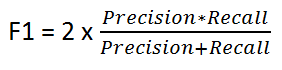

In [134]:
from sklearn.metrics import f1_score

In [135]:
print (f1_score(train_tfidf_Y, y_pred_GaussianNB, average='weighted'))

0.7727386711855427
